# <center> CNN Classification Cat and Dog </center>



## 1.	We want to study the impact of the dataset size on the accuracy of the neural network model. Define a neural network and using three random sizes of the dataset (15K, 20K and 25K), show the accuracy achieved in each case. Show the accuracy versus epoch accuracy plot for each size of the dataset. 

### 1-1 Data Analysis

In [ ]:
import os
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
import cv2
import random
import pickle

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
train_folder= '/PetImages'

In [ ]:
os.listdir(train_folder)

['Dog', 'Cat']

In [ ]:
train_cat = train_folder + '/Cat/'
train_dog = train_folder+ '/Dog/'

In [ ]:
number_train_cat = len(os.listdir(train_cat))
number_train_dog =len(os.listdir(train_dog))

print("The number of Normal Image : ", number_train_cat)
print("The number of Pneumonia Image: ", number_train_dog)

The number of Normal Image :  12591
The number of Pneumonia Image:  12541


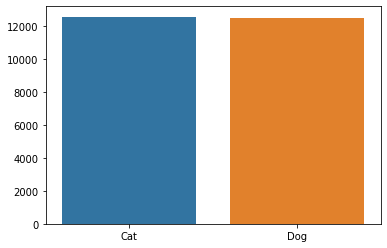

In [ ]:
sns.barplot(x=['Cat','Dog'],y=[number_train_cat,number_train_dog])

In [ ]:
cat_pic_random = os.listdir(train_cat)[10]
dog_pic_random = os.listdir(train_dog)[10]

In [ ]:
cat_pic_path = train_cat+cat_pic_random
dog_pic_path = train_dog+dog_pic_random

In [ ]:
cat_load = Image.open(cat_pic_path)
dog_load = Image.open(dog_pic_path)

Text(0.5, 1.0, 'Dog')

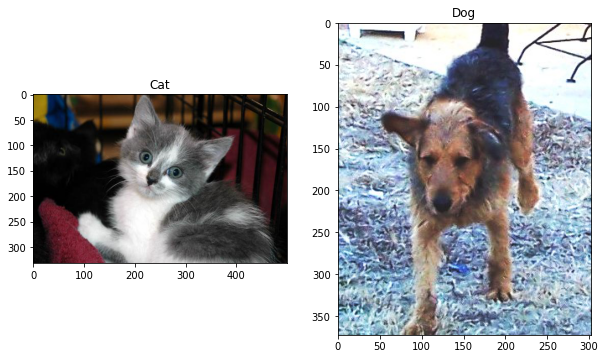

In [ ]:
f = plt.figure(figsize= (10,6))

a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(cat_load)
a1.set_title('Cat')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(dog_load)
a2.set_title('Dog')

### 1-2 Create Training and Test Dataset

In [ ]:
img_dir= '/PetImages'
Categories = ['Cat', 'Dog']

#### 1-2-1 Preparing Dataset 25K

In [ ]:
training_data = []
IMG_SIZE = 70

for category in ["Dog","Cat"]:
  path = os.path.join(img_dir,category)
  class_num = ["Dog","Cat"].index(category)
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      training_data.append([new_array,class_num])
    except Exception as e:
      pass



In [ ]:
len(training_data)

25076

In [ ]:
random.shuffle(training_data)

In [ ]:
X = []
y = []

In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [ ]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [ ]:
X.shape

(25076, 70, 70, 1)

#### Saving the 25K Data

In [ ]:
pickle_out = open('X_25K.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open('y_25K.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

#### 1-2-2 Preparing Dataset 15K

In [ ]:
training_data = []
IMG_SIZE = 70

for category in ["Dog","Cat"]:
  path = os.path.join(img_dir,category)
  class_num = ["Dog","Cat"].index(category)
  for img in os.listdir(path)[:7500]:
    try:
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      training_data.append([new_array,class_num])
    except Exception as e:
      pass



In [ ]:
len(training_data)

14971

In [ ]:
random.shuffle(training_data)

In [ ]:
X = []
y = []

In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [ ]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [ ]:
X.shape

(14971, 70, 70, 1)

#### Saving the 15K Data

In [ ]:
pickle_out = open('X_15K.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open('y_15K.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

#### 1-2-3 Preparing Dataset 20K

In [ ]:
training_data = []
IMG_SIZE = 70

for category in ["Dog","Cat"]:
  path = os.path.join(img_dir,category)
  class_num = ["Dog","Cat"].index(category)
  for img in os.listdir(path)[:10000]:
    try:
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      training_data.append([new_array,class_num])
    except Exception as e:
      pass



In [ ]:
len(training_data)

19961

In [ ]:
random.shuffle(training_data)

In [ ]:
X = []
y = []

In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [ ]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [ ]:
X.shape

(19961, 70, 70, 1)

#### Saving the 20K Data

In [ ]:
pickle_out = open('X_20K.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open('y_20K.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

### Model

### 1-3 Create Training and Test Dataset

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import time
from tensorflow import keras


In [ ]:
X_25K = pickle.load(open('X_25K.pickle', 'rb'))
y_25K = pickle.load(open('y_25K.pickle', 'rb'))
X_20K = pickle.load(open('X_20K.pickle', 'rb'))
y_20K = pickle.load(open('y_20K.pickle', 'rb'))
X_15K = pickle.load(open('X_15K.pickle', 'rb'))
y_15K = pickle.load(open('y_15K.pickle', 'rb'))

### Model

In [ ]:
### For 25K
model1 = Sequential()
model1.add(Conv2D(96, (3,3), input_shape=X_25K.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64, (3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(32, (3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(32, (3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dense(32))
model1.add(Activation('relu'))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 68, 68, 96)        960       
                                                                 
 activation_6 (Activation)   (None, 68, 68, 96)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 34, 34, 96)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        55360     
                                                                 
 activation_7 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

In [ ]:
### For 20K
model2 = Sequential()
model2.add(Conv2D(96, (3,3), input_shape=X_20K.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64, (3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32, (3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32, (3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(32))
model2.add(Activation('relu'))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 68, 68, 96)        960       
                                                                 
 activation_12 (Activation)  (None, 68, 68, 96)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 34, 34, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        55360     
                                                                 
 activation_13 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                 

In [ ]:
### For 15K
model3 = Sequential()
model3.add(Conv2D(96, (3,3), input_shape=X_15K.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64, (3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(32, (3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(32, (3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())
model3.add(Dense(32))
model3.add(Activation('relu'))
model3.add(Dense(1))
model3.add(Activation('sigmoid'))

print(model3.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 68, 68, 96)        960       
                                                                 
 activation_18 (Activation)  (None, 68, 68, 96)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 34, 34, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        55360     
                                                                 
 activation_19 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                 

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])
model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])
model3.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])


In [ ]:
start_time = time.time()

history1 = model1.fit(X_25K, y_25K, batch_size=128, epochs=18, validation_split=0.30)

end_time = time.time()
duration = end_time - start_time
print('duration =', duration)


Epoch 1/18
138/138 [==============================] - 7s 45ms/step - loss: 0.1889 - accuracy: 0.9225 - val_loss: 0.6010 - val_accuracy: 0.8085
Epoch 2/18
138/138 [==============================] - 6s 43ms/step - loss: 0.1543 - accuracy: 0.9356 - val_loss: 0.5999 - val_accuracy: 0.8030
Epoch 3/18
138/138 [==============================] - 6s 43ms/step - loss: 0.1563 - accuracy: 0.9359 - val_loss: 0.7316 - val_accuracy: 0.7900
Epoch 4/18
138/138 [==============================] - 6s 43ms/step - loss: 0.1299 - accuracy: 0.9466 - val_loss: 0.6265 - val_accuracy: 0.8156
Epoch 5/18
138/138 [==============================] - 6s 43ms/step - loss: 0.1173 - accuracy: 0.9531 - val_loss: 0.6576 - val_accuracy: 0.8139
Epoch 6/18
138/138 [==============================] - 6s 43ms/step - loss: 0.1286 - accuracy: 0.9480 - val_loss: 0.7074 - val_accuracy: 0.8035
Epoch 7/18
138/138 [==============================] - 6s 43ms/step - loss: 0.1159 - accuracy: 0.9523 - val_loss: 0.7322 - val_accuracy: 0.8073

In [ ]:
start_time = time.time()

history2 = model2.fit(X_20K, y_20K, batch_size=128, epochs=18, validation_split=0.30)

end_time = time.time()
duration = end_time - start_time
print('duration =', duration)


Epoch 1/18
110/110 [==============================] - 6s 45ms/step - loss: 0.9194 - accuracy: 0.5417 - val_loss: 0.6731 - val_accuracy: 0.5902
Epoch 2/18
110/110 [==============================] - 5s 43ms/step - loss: 0.6636 - accuracy: 0.6001 - val_loss: 0.6469 - val_accuracy: 0.6290
Epoch 3/18
110/110 [==============================] - 5s 43ms/step - loss: 0.6273 - accuracy: 0.6513 - val_loss: 0.6082 - val_accuracy: 0.6747
Epoch 4/18
110/110 [==============================] - 5s 43ms/step - loss: 0.5914 - accuracy: 0.6839 - val_loss: 0.6078 - val_accuracy: 0.6817
Epoch 5/18
110/110 [==============================] - 5s 43ms/step - loss: 0.5733 - accuracy: 0.7034 - val_loss: 0.5651 - val_accuracy: 0.7091
Epoch 6/18
110/110 [==============================] - 5s 43ms/step - loss: 0.5511 - accuracy: 0.7221 - val_loss: 0.6073 - val_accuracy: 0.6858
Epoch 7/18
110/110 [==============================] - 5s 43ms/step - loss: 0.5258 - accuracy: 0.7396 - val_loss: 0.5499 - val_accuracy: 0.7217

In [ ]:
start_time = time.time()

history3 = model3.fit(X_15K, y_15K, batch_size=128, epochs=18, validation_split=0.30)

end_time = time.time()
duration = end_time - start_time
print('duration =', duration)


Epoch 1/18
82/82 [==============================] - 5s 54ms/step - loss: 0.9321 - accuracy: 0.5275 - val_loss: 0.6736 - val_accuracy: 0.5813
Epoch 2/18
82/82 [==============================] - 4s 44ms/step - loss: 0.6707 - accuracy: 0.5837 - val_loss: 0.6684 - val_accuracy: 0.5906
Epoch 3/18
82/82 [==============================] - 4s 44ms/step - loss: 0.6547 - accuracy: 0.6133 - val_loss: 0.6459 - val_accuracy: 0.6249
Epoch 4/18
82/82 [==============================] - 4s 44ms/step - loss: 0.6425 - accuracy: 0.6320 - val_loss: 0.6603 - val_accuracy: 0.6015
Epoch 5/18
82/82 [==============================] - 4s 44ms/step - loss: 0.6090 - accuracy: 0.6683 - val_loss: 0.6019 - val_accuracy: 0.6754
Epoch 6/18
82/82 [==============================] - 4s 44ms/step - loss: 0.5755 - accuracy: 0.6997 - val_loss: 0.5910 - val_accuracy: 0.6870
Epoch 7/18
82/82 [==============================] - 4s 44ms/step - loss: 0.5537 - accuracy: 0.7179 - val_loss: 0.5599 - val_accuracy: 0.7137
Epoch 8/18
82

In [ ]:
epochs=18

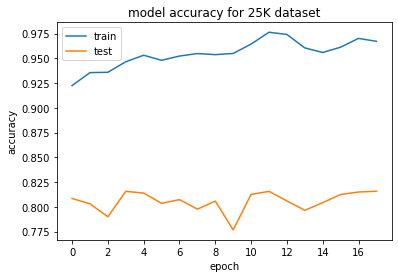

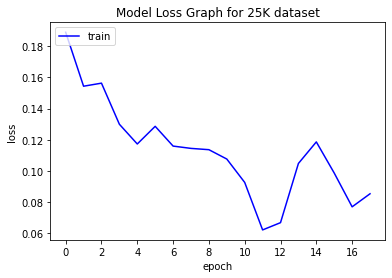

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy for 25K dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
x_ticks = list(range(0,18,2))
plt.xticks(x_ticks)
plt.show()

plt.title('Model Loss Graph for 25K dataset')
plt.plot(history1.history['loss'],color='b', label="Training loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
x_ticks = list(range(0,18,2))
plt.xticks(x_ticks)
plt.show()


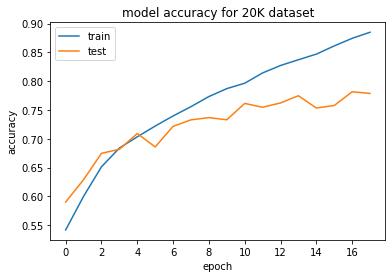

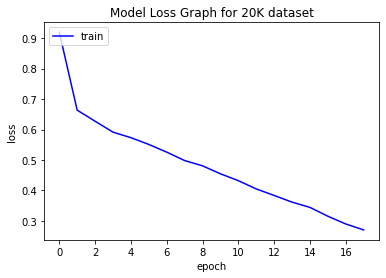

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy for 20K dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
x_ticks = list(range(0,18,2))
plt.xticks(x_ticks)
plt.show()

plt.title('Model Loss Graph for 20K dataset')
plt.plot(history2.history['loss'],color='b', label="Training loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
x_ticks = list(range(0,18,2))
plt.xticks(x_ticks)
plt.show()


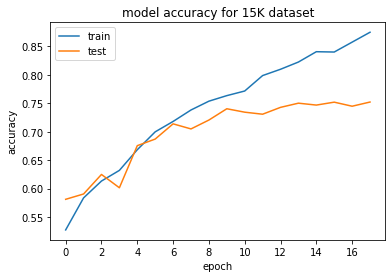

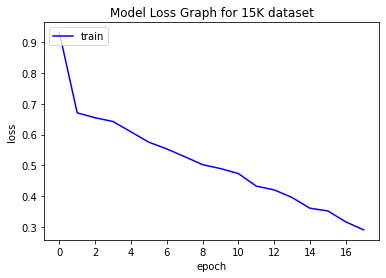

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy for 15K dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
x_ticks = list(range(0,18,2))
plt.xticks(x_ticks)
plt.show()

plt.title('Model Loss Graph for 15K dataset')
plt.plot(history3.history['loss'],color='b', label="Training loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
x_ticks = list(range(0,18,2))
plt.xticks(x_ticks)
plt.show()


## 2.	We want to study the impact of the model’s architecture used on the model’s accuracy: Choose a reasonable size of images, between 15k and 25K, from the dataset to answer this question. Implement two different neural network architectures using a combination of convolutional, pooling, dense, and flatten layers. The architectural models should have a minimum of 5 layers. Report on the results obtained in each case. For each architecture, show the accuracy versus epoch plot. 

#### 2-1) Model - 1

In [ ]:
cnn_model1 = Sequential()
cnn_model1.add(Conv2D(64,(3,3),padding ='Same',activation = 'relu', input_shape=X_20K.shape[1:]))
cnn_model1.add(MaxPooling2D(2,2))
cnn_model1.add(Conv2D(64,(3,3) ,padding ='same',activation='relu'))
cnn_model1.add(MaxPooling2D(2,2))
cnn_model1.add(Conv2D(128,(3,3),padding ='same',activation='relu'))
cnn_model1.add(MaxPooling2D(2,2)) 
cnn_model1.add(Conv2D(128,(3,3) ,padding ='same',activation='relu'))
cnn_model1.add(MaxPooling2D(2,2)) 
cnn_model1.add(Conv2D(256,(3,3) ,padding ='same',activation='relu'))
cnn_model1.add(MaxPooling2D(2,2)) 
cnn_model1.add(BatchNormalization())
cnn_model1.add(Conv2D(256,(3,3) ,padding ='same',activation='relu'))
cnn_model1.add(MaxPooling2D(2,2)) 
cnn_model1.add(BatchNormalization())


cnn_model1.add(Flatten())
cnn_model1.add(Dense(32))
cnn_model1.add(Activation('relu'))
cnn_model1.add(Dense(1))
cnn_model1.add(Activation('sigmoid'))

cnn_model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 70, 70, 64)        640       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 35, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 35, 35, 64)        36928     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 17, 17, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 8, 8, 128)       

In [ ]:
cnn_model1.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])

In [ ]:
start_time = time.time()

history_cnn_model1 = cnn_model1.fit(X_20K, y_20K, batch_size=128, epochs=30, validation_split=0.20)

end_time = time.time()
duration = end_time - start_time
print('duration =', duration)


Epoch 1/30
125/125 [==============================] - 7s 47ms/step - loss: 0.6773 - accuracy: 0.6117 - val_loss: 0.9393 - val_accuracy: 0.5570
Epoch 2/30
125/125 [==============================] - 6s 45ms/step - loss: 0.5735 - accuracy: 0.6998 - val_loss: 0.9872 - val_accuracy: 0.5001
Epoch 3/30
125/125 [==============================] - 6s 46ms/step - loss: 0.4901 - accuracy: 0.7605 - val_loss: 0.4970 - val_accuracy: 0.7719
Epoch 4/30
125/125 [==============================] - 6s 46ms/step - loss: 0.4157 - accuracy: 0.8090 - val_loss: 0.4586 - val_accuracy: 0.7891
Epoch 5/30
125/125 [==============================] - 6s 46ms/step - loss: 0.3615 - accuracy: 0.8419 - val_loss: 0.4165 - val_accuracy: 0.8199
Epoch 6/30
125/125 [==============================] - 6s 46ms/step - loss: 0.3060 - accuracy: 0.8677 - val_loss: 2.5834 - val_accuracy: 0.5034
Epoch 7/30
125/125 [==============================] - 6s 46ms/step - loss: 0.2627 - accuracy: 0.8893 - val_loss: 0.9620 - val_accuracy: 0.6877

In [ ]:
epochs=30

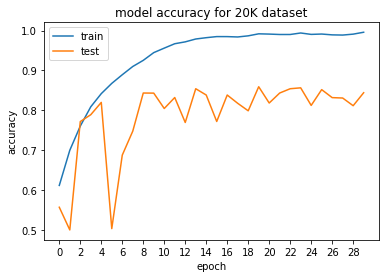

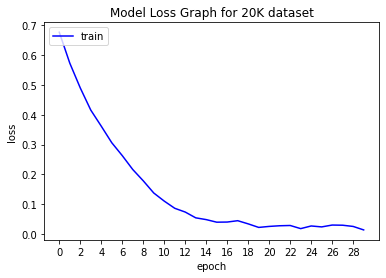

In [ ]:
plt.plot(history_cnn_model1.history['accuracy'])
plt.plot(history_cnn_model1.history['val_accuracy'])
plt.title('model accuracy for 20K dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
x_ticks = list(range(0,epochs,2))
plt.xticks(x_ticks)
plt.show()

plt.title('Model Loss Graph for 20K dataset')
plt.plot(history_cnn_model1.history['loss'],color='b', label="Training loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
x_ticks = list(range(0,epochs,2))
plt.xticks(x_ticks)
plt.show()


#### 2-1) Model - 2

In [ ]:
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(64,(3,3),padding ='Same',activation = 'relu', input_shape=X_20K.shape[1:]))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Conv2D(64,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Conv2D(128,(3,3),padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(Conv2D(128,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(Conv2D(256,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(BatchNormalization())
cnn_model2.add(Conv2D(512,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(BatchNormalization())


cnn_model2.add(Flatten())
cnn_model2.add(Dense(128))
cnn_model2.add(Activation('relu'))
cnn_model2.add(Dense(1))
cnn_model2.add(Activation('sigmoid'))

cnn_model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 70, 70, 64)        640       
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 35, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 35, 35, 64)        36928     
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 17, 17, 128)       73856     
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 8, 8, 128)      

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01, decay=0.01)

In [ ]:
cnn_model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
start_time = time.time()

history_cnn_model2 = cnn_model2.fit(X_20K, y_20K, batch_size=128, epochs=30, validation_split=0.20)

end_time = time.time()
duration = end_time - start_time
print('duration =', duration)


Epoch 1/30
125/125 [==============================] - 6s 47ms/step - loss: 0.1758 - accuracy: 0.9300 - val_loss: 0.7229 - val_accuracy: 0.7596
Epoch 2/30
125/125 [==============================] - 6s 47ms/step - loss: 0.1654 - accuracy: 0.9305 - val_loss: 0.8170 - val_accuracy: 0.7593
Epoch 3/30
125/125 [==============================] - 6s 47ms/step - loss: 0.1396 - accuracy: 0.9442 - val_loss: 0.7626 - val_accuracy: 0.7801
Epoch 4/30
125/125 [==============================] - 6s 47ms/step - loss: 0.1336 - accuracy: 0.9475 - val_loss: 0.7171 - val_accuracy: 0.7976
Epoch 5/30
125/125 [==============================] - 6s 47ms/step - loss: 0.1150 - accuracy: 0.9550 - val_loss: 0.7399 - val_accuracy: 0.7814
Epoch 6/30
125/125 [==============================] - 6s 47ms/step - loss: 0.1028 - accuracy: 0.9614 - val_loss: 0.7491 - val_accuracy: 0.7891
Epoch 7/30
125/125 [==============================] - 6s 47ms/step - loss: 0.0887 - accuracy: 0.9686 - val_loss: 0.7834 - val_accuracy: 0.7936

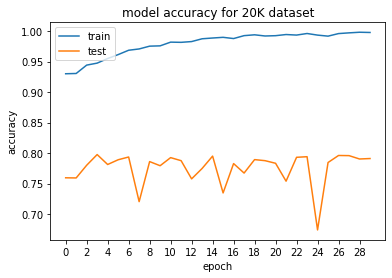

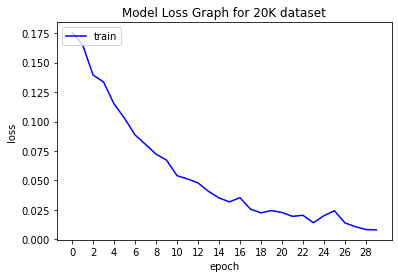

In [ ]:
plt.plot(history_cnn_model2.history['accuracy'])
plt.plot(history_cnn_model2.history['val_accuracy'])
plt.title('model accuracy for 20K dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
x_ticks = list(range(0,epochs,2))
plt.xticks(x_ticks)
plt.show()

plt.title('Model Loss Graph for 20K dataset')
plt.plot(history_cnn_model2.history['loss'],color='b', label="Training loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
x_ticks = list(range(0,epochs,2))
plt.xticks(x_ticks)
plt.show()


## 3.	We want to study the impact of image resolution on the model’s accuracy: using a dataset size of your choosing (15K, 20K, or 25K) and one of the two model architecture from question 2. Report on the accuracy achieved when using image resolutions of 80x80, 120x120, and 200x200. 

#### 80x80

In [ ]:
training_data = []
IMG_SIZE = 80

for category in ["Dog","Cat"]:
  path = os.path.join(img_dir,category)
  class_num = ["Dog","Cat"].index(category)
  for img in os.listdir(path)[:10000]:
    try:
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      training_data.append([new_array,class_num])
    except Exception as e:
      pass



In [ ]:
len(training_data)

19961

In [ ]:
random.shuffle(training_data)

In [ ]:
X = []
y = []

In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [ ]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [ ]:
X.shape

(19961, 80, 80, 1)

#### Saving Data 80x80 - 20K

In [ ]:
pickle_out = open('X_20K_80x80.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open('y_20K_80x80.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

#### 120x120

In [ ]:
training_data = []
IMG_SIZE = 120

for category in ["Dog","Cat"]:
  path = os.path.join(img_dir,category)
  class_num = ["Dog","Cat"].index(category)
  for img in os.listdir(path)[:10000]:
    try:
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      training_data.append([new_array,class_num])
    except Exception as e:
      pass



In [ ]:
len(training_data)

19961

In [ ]:
random.shuffle(training_data)

In [ ]:
X = []
y = []

In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [ ]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [ ]:
X.shape

(19961, 120, 120, 1)

#### Saving Data 120x120 - 20K

In [ ]:
pickle_out = open('X_20K_120x120.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open('y_20K_120x120.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

#### 200x200

In [ ]:
training_data = []
IMG_SIZE = 200

for category in ["Dog","Cat"]:
  path = os.path.join(img_dir,category)
  class_num = ["Dog","Cat"].index(category)
  for img in os.listdir(path)[:10000]:
    try:
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      training_data.append([new_array,class_num])
    except Exception as e:
      pass



In [ ]:
len(training_data)

19961

In [ ]:
random.shuffle(training_data)

In [ ]:
X = []
y = []

In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [ ]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [ ]:
X.shape

(19961, 200, 200, 1)

#### Saving Data 200x200 - 20K

In [ ]:
pickle_out = open('X_20K_200x200.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open('y_20K_200x200.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

### Loading Dataset

In [ ]:

X_20K_80_80 = pickle.load(open('X_20K_80x80.pickle', 'rb'))
y_20K_80_80 = pickle.load(open('y_20K_80x80.pickle', 'rb'))

X_20K_120_120 = pickle.load(open('X_20K_120x120.pickle', 'rb'))
y_20K_120_120 = pickle.load(open('y_20K_120x120.pickle', 'rb'))

X_20K_200_200 = pickle.load(open('X_20K_200x200.pickle', 'rb'))
y_20K_200_200 = pickle.load(open('y_20K_200x200.pickle', 'rb'))

## 4.	Using the code from the previous question, make predictions on images of 20 images of dogs and cats that you download from the Web. 

### 80x80

In [ ]:
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(64,(3,3),padding ='Same',activation = 'relu', input_shape=X_20K_80_80.shape[1:]))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Conv2D(64,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Conv2D(128,(3,3),padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(Conv2D(128,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(Conv2D(256,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(BatchNormalization())
cnn_model2.add(Conv2D(512,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(BatchNormalization())


cnn_model2.add(Flatten())
cnn_model2.add(Dense(128))
cnn_model2.add(Activation('relu'))
cnn_model2.add(Dense(1))
cnn_model2.add(Activation('sigmoid'))

cnn_model2.summary()

opt = keras.optimizers.Adam(learning_rate=0.01, decay=0.01)
cnn_model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
start_time = time.time()

history_80_80 = cnn_model2.fit(X_20K_80_80, y_20K_80_80, batch_size=128, epochs=30, validation_split=0.20)

end_time = time.time()
duration = end_time - start_time
print('duration =', duration)


Epoch 1/30
125/125 [==============================] - 9s 61ms/step - loss: 0.6666 - accuracy: 0.8020 - val_loss: 0.7950 - val_accuracy: 0.7315
Epoch 2/30
125/125 [==============================] - 6s 51ms/step - loss: 0.3495 - accuracy: 0.8498 - val_loss: 0.4314 - val_accuracy: 0.8174
Epoch 3/30
125/125 [==============================] - 6s 51ms/step - loss: 0.2995 - accuracy: 0.8688 - val_loss: 0.5856 - val_accuracy: 0.7731
Epoch 4/30
125/125 [==============================] - 6s 51ms/step - loss: 0.2675 - accuracy: 0.8870 - val_loss: 0.4477 - val_accuracy: 0.8317
Epoch 5/30
125/125 [==============================] - 6s 51ms/step - loss: 0.2418 - accuracy: 0.8974 - val_loss: 0.8289 - val_accuracy: 0.7363
Epoch 6/30
125/125 [==============================] - 6s 52ms/step - loss: 0.2238 - accuracy: 0.9066 - val_loss: 0.5623 - val_accuracy: 0.8212
Epoch 7/30
125/125 [==============================] - 6s 52ms/step - loss: 0.2074 - accuracy: 0.9133 - val_loss: 0.5540 - val_accuracy: 0.7916

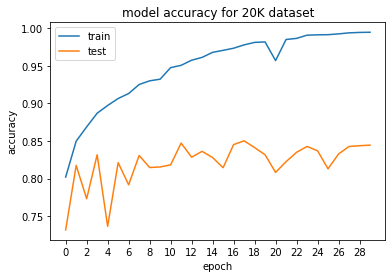

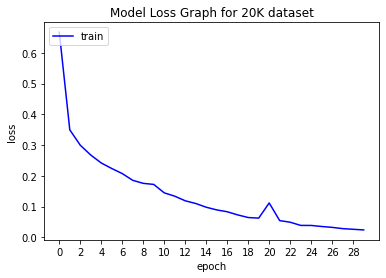

In [ ]:
plt.title('model accuracy for 20K - 80X80 dataset')
plt.plot(history_80_80.history['accuracy'])
plt.plot(history_80_80.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
x_ticks = list(range(0,epochs,2))
plt.xticks(x_ticks)
plt.show()

plt.title('Model Loss Graph for 20K - 80x80 dataset')
plt.plot(history_80_80.history['loss'],color='b', label="Training loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
x_ticks = list(range(0,epochs,2))
plt.xticks(x_ticks)
plt.show()


#### 120x120

In [ ]:
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(64,(3,3),padding ='Same',activation = 'relu', input_shape=X_20K_120_120.shape[1:]))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Conv2D(64,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Conv2D(128,(3,3),padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(Conv2D(128,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(Conv2D(256,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(BatchNormalization())
cnn_model2.add(Conv2D(512,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(BatchNormalization())


cnn_model2.add(Flatten())
cnn_model2.add(Dense(128))
cnn_model2.add(Activation('relu'))
cnn_model2.add(Dense(1))
cnn_model2.add(Activation('sigmoid'))

cnn_model2.summary()

opt = keras.optimizers.Adam(learning_rate=0.01, decay=0.01)
cnn_model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
start_time = time.time()

history_120_120 = cnn_model2.fit(X_20K_120_120, y_20K_120_120, batch_size=128, epochs=30, validation_split=0.20)

end_time = time.time()
duration = end_time - start_time
print('duration =', duration)


Epoch 1/30
125/125 [==============================] - 17s 128ms/step - loss: 0.7534 - accuracy: 0.7617 - val_loss: 0.9567 - val_accuracy: 0.7330
Epoch 2/30
125/125 [==============================] - 14s 111ms/step - loss: 0.4311 - accuracy: 0.8159 - val_loss: 0.8483 - val_accuracy: 0.7643
Epoch 3/30
125/125 [==============================] - 14s 111ms/step - loss: 0.3775 - accuracy: 0.8382 - val_loss: 1.0180 - val_accuracy: 0.6935
Epoch 4/30
125/125 [==============================] - 14s 111ms/step - loss: 0.3311 - accuracy: 0.8561 - val_loss: 0.8472 - val_accuracy: 0.8007
Epoch 5/30
125/125 [==============================] - 14s 111ms/step - loss: 0.2945 - accuracy: 0.8723 - val_loss: 0.9505 - val_accuracy: 0.8227
Epoch 6/30
125/125 [==============================] - 14s 111ms/step - loss: 0.2740 - accuracy: 0.8861 - val_loss: 1.2282 - val_accuracy: 0.8337
Epoch 7/30
125/125 [==============================] - 14s 111ms/step - loss: 0.2495 - accuracy: 0.8951 - val_loss: 1.6739 - val_ac

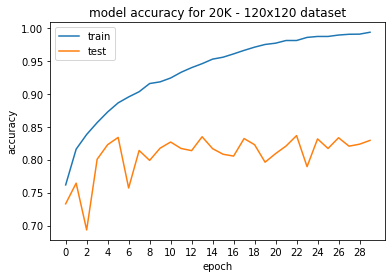

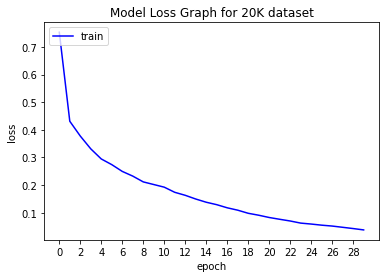

In [ ]:
plt.plot(history_120_120.history['accuracy'])
plt.plot(history_120_120.history['val_accuracy'])
plt.title('model accuracy for 20K - 120x120 dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
x_ticks = list(range(0,epochs,2))
plt.xticks(x_ticks)
plt.show()

plt.title('Model Loss Graph for 20K dataset - 120x120')
plt.plot(history_120_120.history['loss'],color='b', label="Training loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
x_ticks = list(range(0,epochs,2))
plt.xticks(x_ticks)
plt.show()


#### 200x200

In [ ]:
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(64,(3,3),padding ='Same',activation = 'relu', input_shape=X_20K_200_200.shape[1:]))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Conv2D(64,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Conv2D(128,(3,3),padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(Conv2D(128,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(Conv2D(256,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(BatchNormalization())
cnn_model2.add(Conv2D(512,(3,3) ,padding ='same',activation='relu'))
cnn_model2.add(MaxPooling2D(2,2)) 
cnn_model2.add(BatchNormalization())


cnn_model2.add(Flatten())
cnn_model2.add(Dense(128))
cnn_model2.add(Activation('relu'))
cnn_model2.add(Dense(1))
cnn_model2.add(Activation('sigmoid'))

cnn_model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_107 (Conv2D)         (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d_107 (MaxPooli  (None, 100, 100, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_108 (Conv2D)         (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_108 (MaxPooli  (None, 50, 50, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_109 (Conv2D)         (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_109 (MaxPooli  (None, 25, 25, 128)    

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01, decay=0.01)
cnn_model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
start_time = time.time()

history_200_200 = cnn_model2.fit(X_20K_200_200, y_20K_200_200, batch_size=128, epochs=30, validation_split=0.20)

end_time = time.time()
duration = end_time - start_time
print('duration =', duration)


Epoch 1/30
125/125 [==============================] - 43s 320ms/step - loss: 1.5984 - accuracy: 0.5527 - val_loss: 0.7013 - val_accuracy: 0.5450
Epoch 2/30
125/125 [==============================] - 34s 271ms/step - loss: 0.6617 - accuracy: 0.5981 - val_loss: 0.6584 - val_accuracy: 0.5985
Epoch 3/30
125/125 [==============================] - 34s 274ms/step - loss: 0.6436 - accuracy: 0.6249 - val_loss: 0.6604 - val_accuracy: 0.6081
Epoch 4/30
125/125 [==============================] - 34s 273ms/step - loss: 0.6255 - accuracy: 0.6428 - val_loss: 0.6618 - val_accuracy: 0.6261
Epoch 5/30
125/125 [==============================] - 34s 273ms/step - loss: 0.6054 - accuracy: 0.6653 - val_loss: 0.7045 - val_accuracy: 0.5833
Epoch 6/30
125/125 [==============================] - 34s 273ms/step - loss: 0.5813 - accuracy: 0.6923 - val_loss: 0.5937 - val_accuracy: 0.6832
Epoch 7/30
125/125 [==============================] - 34s 273ms/step - loss: 0.5580 - accuracy: 0.7062 - val_loss: 0.7243 - val_ac

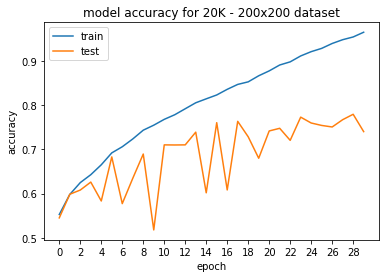

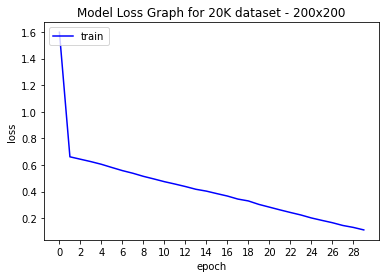

In [ ]:
plt.plot(history_200_200.history['accuracy'])
plt.plot(history_200_200.history['val_accuracy'])
plt.title('model accuracy for 20K - 200x200 dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
x_ticks = list(range(0,epochs,2))
plt.xticks(x_ticks)
plt.show()

plt.title('Model Loss Graph for 20K dataset - 200x200')
plt.plot(history_200_200.history['loss'],color='b', label="Training loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
x_ticks = list(range(0,epochs,2))
plt.xticks(x_ticks)
plt.show()


## 4.	Using the code from the previous question, make predictions on images of 20 images of dogs and cats that you download from the Web. 

In [ ]:
img_array = cv2.imread('cat1.jpeg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 17ms/step
Dog


In [ ]:
img_array = cv2.imread('cat2.jpg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 15ms/step
Cat


In [ ]:
img_array = cv2.imread('cat3.jpeg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 16ms/step
Cat


In [ ]:
img_array = cv2.imread('cat4.jpg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 20ms/step
Cat


In [ ]:
img_array = cv2.imread('cat5.jpg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 17ms/step
Cat


In [ ]:
img_array = cv2.imread('cat6.jpeg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 18ms/step
Cat


In [ ]:
img_array = cv2.imread('cat7.jpeg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 16ms/step
Cat


In [ ]:
img_array = cv2.imread('cat8.jpg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 17ms/step
Cat


In [ ]:
img_array = cv2.imread('cat9.jpg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 20ms/step
Dog


In [ ]:
img_array = cv2.imread('cat10.jpg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 18ms/step
Cat


In [ ]:
img_array = cv2.imread('dog1.jpeg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 16ms/step
Dog


In [ ]:
img_array = cv2.imread('dog2.jpeg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 18ms/step
Dog


In [ ]:
img_array = cv2.imread('dog3.jpg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 18ms/step
Dog


In [ ]:
img_array = cv2.imread('dog4.jpg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 16ms/step
Dog


In [ ]:
img_array = cv2.imread('dog5.jpg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 16ms/step
Dog


In [ ]:
img_array = cv2.imread('dog6.jpg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 15ms/step
Dog


In [ ]:
img_array = cv2.imread('dog7.jpeg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 15ms/step
Dog


In [ ]:
img_array = cv2.imread('dog8.jpeg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 16ms/step
Cat


In [ ]:
img_array = cv2.imread('dog9.jpeg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 14ms/step
Dog


In [ ]:
img_array = cv2.imread('dog10.jpg', cv2.IMREAD_GRAYSCALE) # convert image to gray scale
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # adjust dimensions

prediction1 = cnn_model2.predict(an_image)
print(["Dog", "Cat"][int(round(prediction1[0][0]))])

1/1 [==============================] - 0s 17ms/step
Cat


In [ ]:
%%shell
jupyter nbconvert --to html /content/Assignment_2.ipynb

[NbConvertApp] Converting notebook /content/Assignment_2.ipynb to html
[NbConvertApp] Writing 1256201 bytes to /content/Assignment_2.html
